In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from pandas_datapackage_reader import read_datapackage

In [3]:
gcb = read_datapackage("datapackage.json")

In [4]:
gcb.keys()

dict_keys(['fossil-fuel-cement', 'fossil-fuel-cement-per-capita', 'historical-budget', 'land-use-change', 'ocean-sink', 'terrestrial-sink', 'territorial-emissions-cdiac', 'territorial-emissions-gcb', 'country-definitions', 'consumption-emissions', 'emissions-transfers'])

In [5]:
emissions = gcb["territorial-emissions-gcb"]

In [6]:
emissions.head()

CDIAC-Name  Emissions Source
Name        Year                               
Afghanistan 1959  AFGHANISTAN      0.105  CDIAC
            1960  AFGHANISTAN      0.113  CDIAC
            1961  AFGHANISTAN      0.134  CDIAC
            1962  AFGHANISTAN      0.188  CDIAC
            1963  AFGHANISTAN      0.193  CDIAC

In [7]:
unit = emissions.metadata["schema"]["fields"][3]["unit"]

In [8]:
emissions = emissions.drop(["CDIAC-Name", "Source"], axis=1)

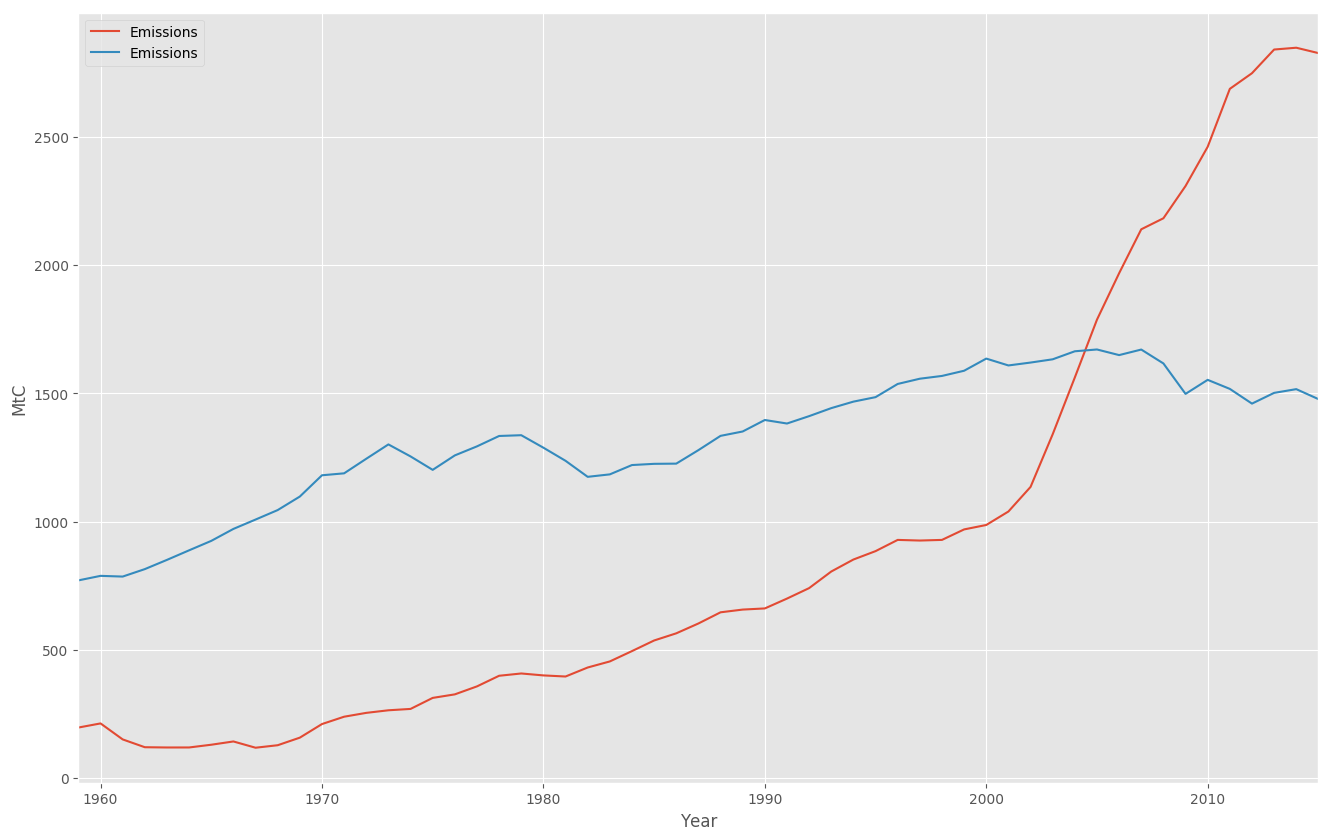

In [9]:
ax = emissions.loc["China"].plot()
emissions.loc["USA"].plot(ax=ax)
plt.ylabel(unit)
plt.legend()

In [10]:
consumption = gcb["consumption-emissions"]

In [11]:
consumption.head()

CDIAC-Name  Consumption-Emissions Source
Name   Year                                         
Africa 1990     Africa                162.303  CDIAC
       1991     Africa                168.640  CDIAC
       1992     Africa                176.991  CDIAC
       1993     Africa                179.846  CDIAC
       1994     Africa                181.901  CDIAC

In [12]:
unit_consumption = consumption.metadata["schema"]["fields"][3]["unit"]


In [13]:
consumption = consumption.drop(["CDIAC-Name", "Source"], axis=1)

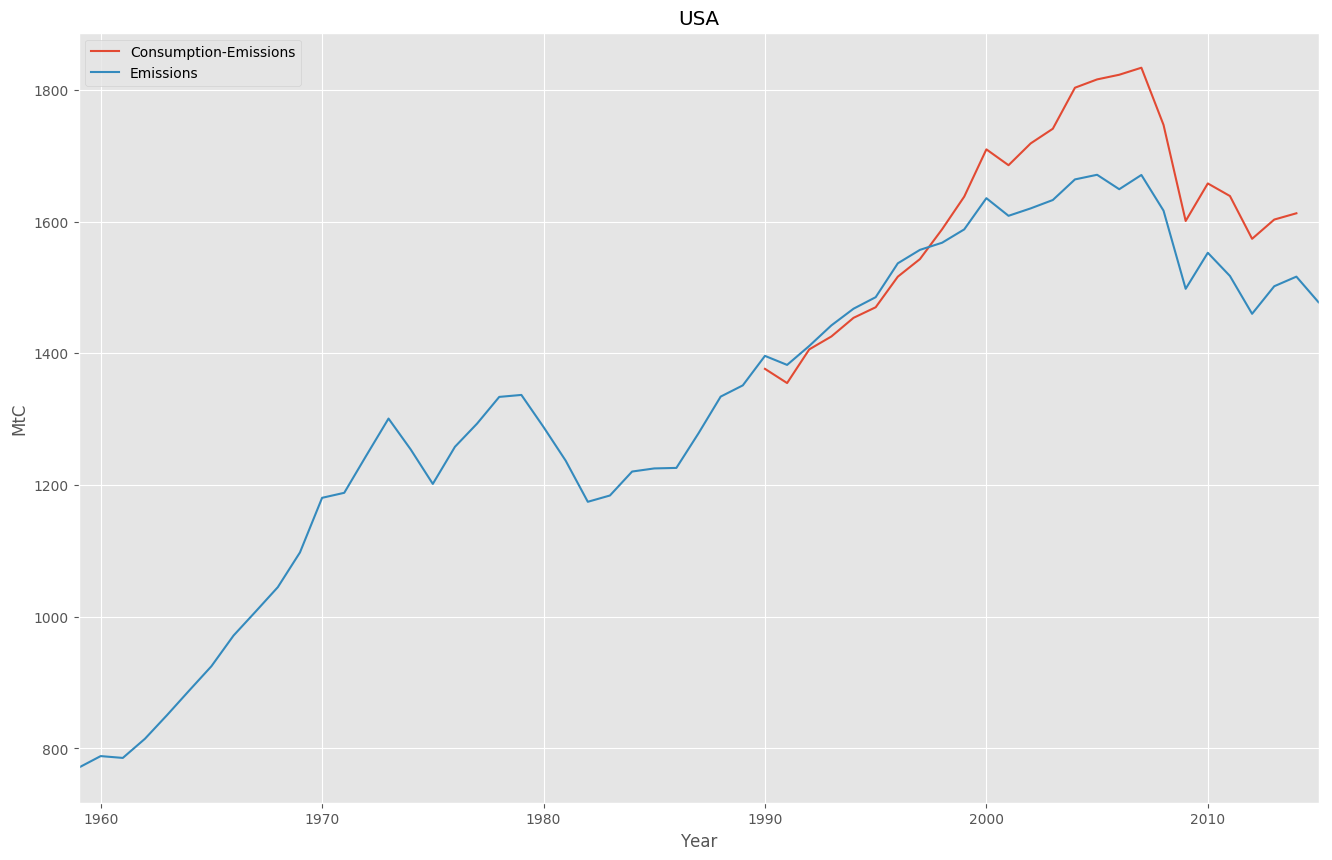

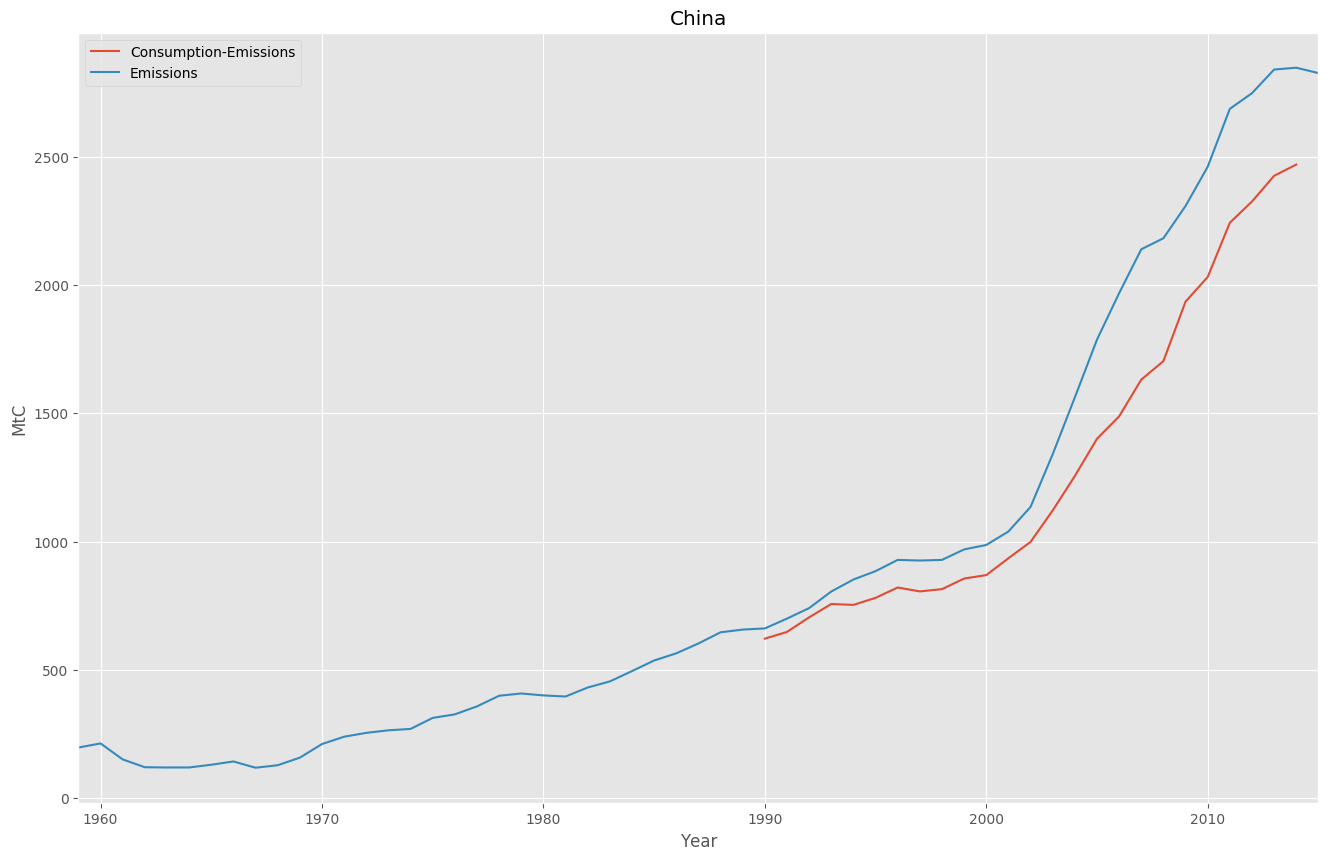

In [14]:
for name in ["USA", "China"]:
    ax = consumption.loc[name].plot()
    emissions.loc[name].plot(ax=ax)
    assert unit == unit_consumption
    plt.title(name)
    plt.ylabel(unit)